*      CRIM - per capita crime rate by town
*      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*      INDUS - proportion of non-retail business acres per town.
*      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*      NOX - nitric oxides concentration (parts per 10 million)
*      RM - average number of rooms per dwelling
*      AGE - proportion of owner-occupied units built prior to 1940
*      DIS - weighted distances to five Boston employment centres
*      RAD - index of accessibility to radial highways
*      TAX - full-value property-tax rate per $10,000 

*      PTRATIO - pupil-teacher ratio by town
*      LSTAT - % lower status of the population
*      MEDV - Median value of owner-occupied homes in $1000's

In [29]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [33]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

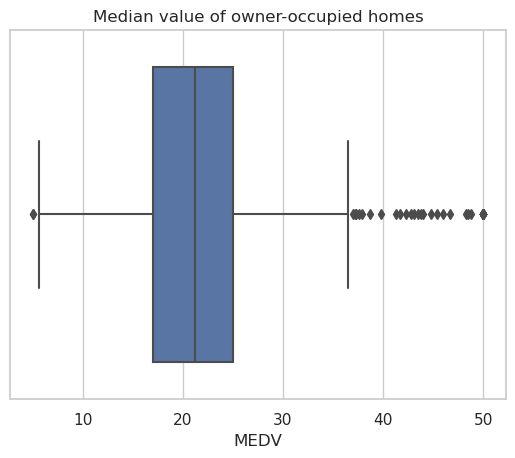

In [5]:
sns.set(style = "whitegrid")
#labels=['MEDV','boh']
ax = sns.boxplot(x = 'MEDV', data = boston_df)
ax.set_title("Median value of owner-occupied homes")

Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles river')

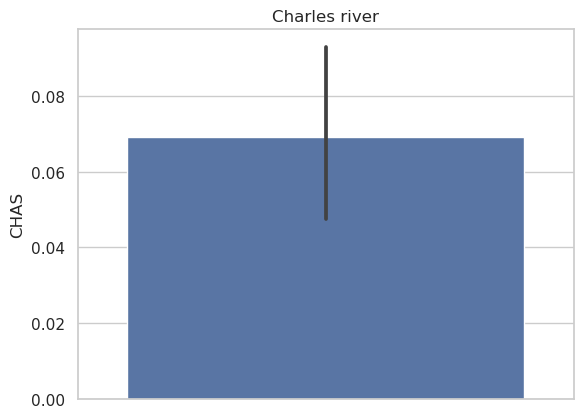

In [21]:
ax = sns.barplot(y = 'CHAS', data = boston_df)
ax.set_title("Charles river")

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median value of owner-occupied homes vs AGE')

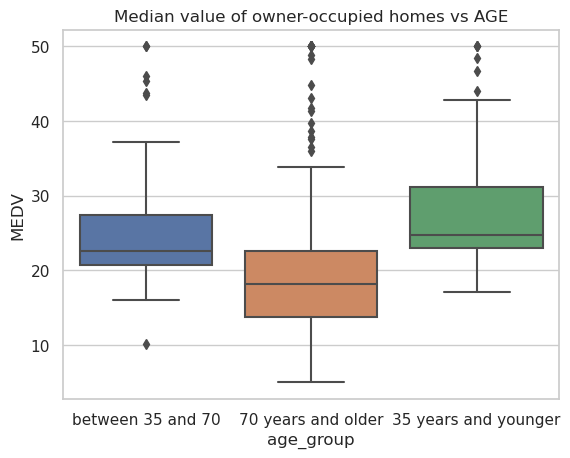

In [22]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'

boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(y = 'MEDV',x="age_group", data = boston_df)
ax.set_title("Median value of owner-occupied homes vs AGE" )

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

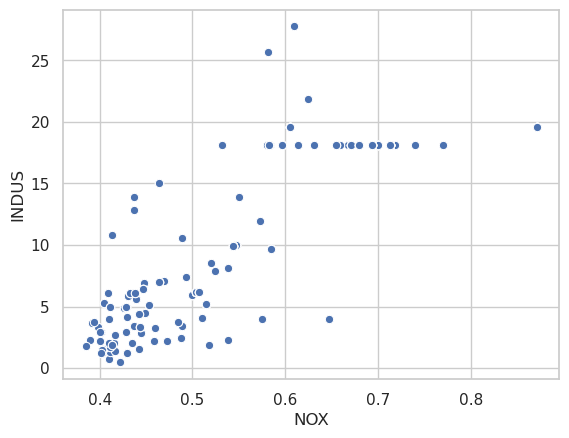

In [33]:
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set_title("Nitric Oxide vs the proportion of non-retail business acres per town")

Create a histogram for the pupil to teacher ratio variable

In [9]:
#ax = sns.catplot(x = 'PTRATIO', kind = 'count',data = boston_df)
#ax.set_title("pupil to teacher ratio variable")

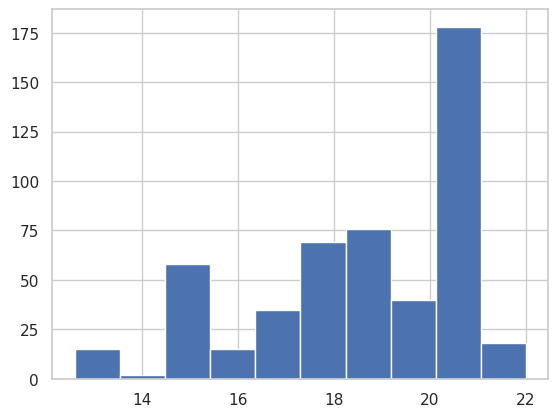

In [12]:
ax = plt.hist(boston_df['PTRATIO'])

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in value of houses bounded by the Charles river or not")


Run the t-test

In [21]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] <0.5]['MEDV'],
                   boston_df[boston_df['CHAS'] >0.5]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis 
as there is enough proof that there is a statistical difference in value of houses bounded by the Charles river or not 

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

Run the test ANOVA

In [25]:
thirtifith_lower_eval = boston_df[boston_df['AGE'] <= 35]['MEDV'] 
thirtifith_seventy_eval = boston_df[(boston_df['AGE']> 35)&(boston_df['AGE'] < 70)]['MEDV'] 
seventy_older_eval = boston_df[boston_df['AGE']>= 70]['MEDV'] 

In [26]:
f_statistic, p_value = scipy.stats.f_oneway(thirtifith_lower_eval, thirtifith_seventy_eval, seventy_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is **not** proportion of non-retail business acres per town
*   $H\_1:$  Nitric oxide concentrations is proportion of non-retail business acres per town

In [28]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

(0.7636514469209149, 7.913361061240043e-98)

**Conclusion:** Since the p-value is < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [32]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        13:20:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between the additional weighted distance  to the five Boston employment centres  and the median value of owner occupied homes